In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import plotly.express as px
import scipy.stats as stats
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('India Movies.csv',encoding='latin1')
df.head(10)  

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [3]:
df.isnull().sum()


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
print("unique count")
print(df.nunique())
print("Null count")
df.isnull().sum()

unique count
Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64
Null count


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
def missing_values_percent(dataframe):
    missing_values = dataframe.isna().sum()
    percentage_missing = (missing_values / len(dataframe) * 100).round(2)

    result_movie = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
    result_movie['Percentage'] = result_movie['Percentage'].astype(str) + '%'

    return result_movie


result = missing_values_percent(df)
result

,Missing Values,Percentage
Name,0,0.0%
Year,528,3.4%
Duration,8269,53.32%
Genre,1877,12.1%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%
Actor 2,2384,15.37%
Actor 3,3144,20.27%


In [45]:
def TopTenPlot(column, color='blue'):
    global df
    df[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k", color=color)
    plt.xticks(rotation=0)
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

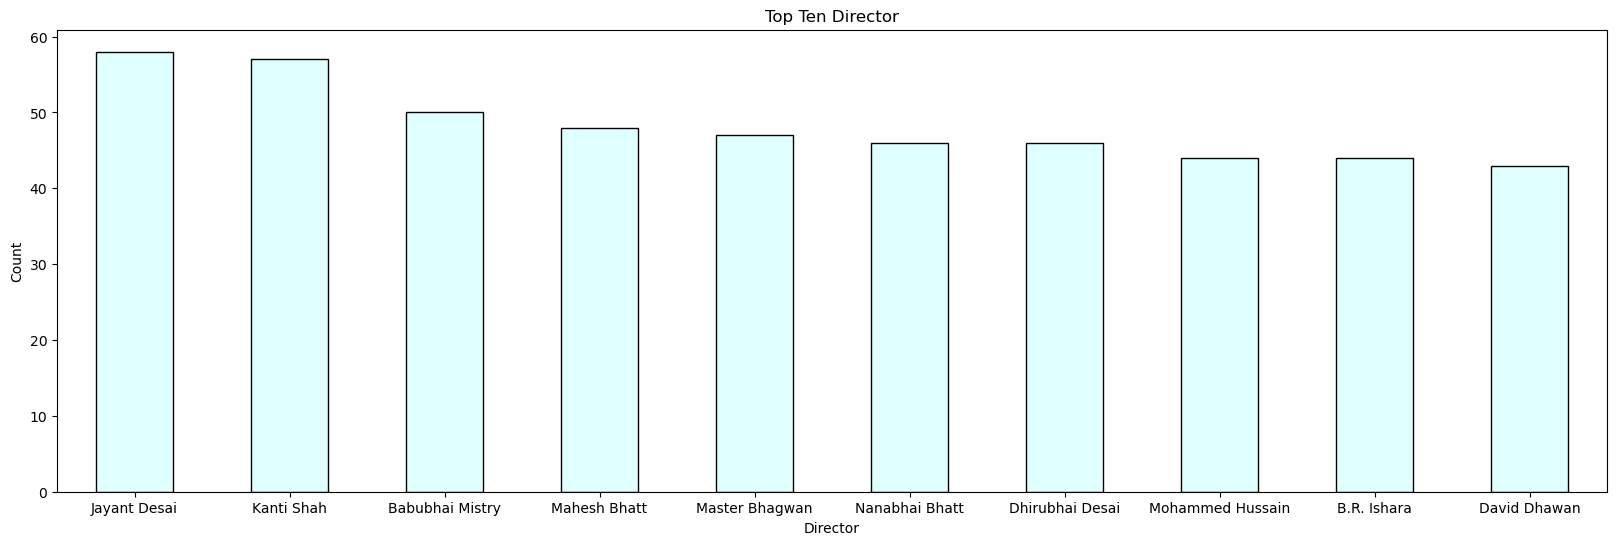

In [59]:
TopTenPlot("Director" , color="lightcyan")

In [46]:
def Histogram(column, color="blue"):
    global df
    plt.figure(figsize=(20,6))
    plt.hist(df[column], edgecolor="k", color=color)
    plt.xticks(rotation=0)
    plt.title("Histogram of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

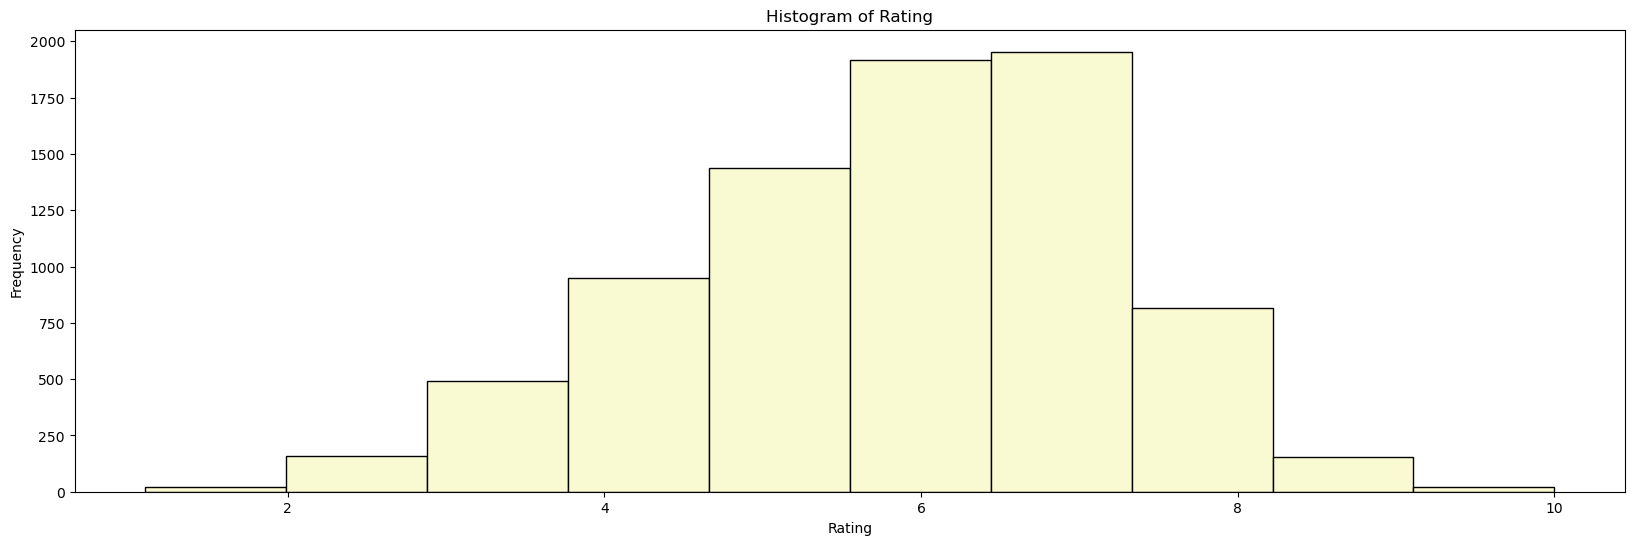

In [57]:
Histogram("Rating", color="lightgoldenrodyellow")

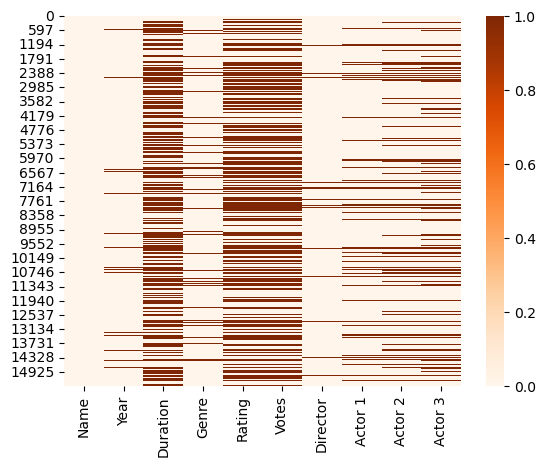

In [17]:
sns.heatmap(df.isnull(), cmap= 'Oranges')
plt.show()


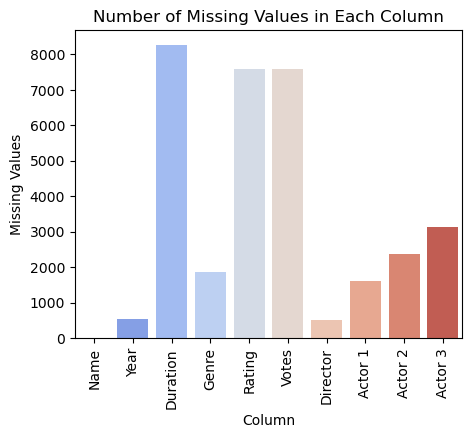

In [21]:
missing_values = df.isnull().sum()

# Convert the Series to a DataFrame for plotting
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column', 'Missing Values']

# Plot using seaborn's barplot
plt.figure(figsize=(5, 4))
sns.barplot(x='Column', y='Missing Values', data=missing_values_df , palette="coolwarm")
plt.xticks(rotation=90)  
plt.title('Number of Missing Values in Each Column')
plt.show()

In [25]:
df['Rating'].fillna(df['Rating'].mean())

0        5.841621
1        7.000000
2        5.841621
3        4.400000
4        5.841621
           ...   
15504    4.600000
15505    4.500000
15506    5.841621
15507    5.841621
15508    6.200000
Name: Rating, Length: 15509, dtype: float64

In [26]:
df=df.dropna(subset=['Year'],axis=0)
df['Year'].head()
df['Year'] = df['Year'].str.replace('(', '', regex=False).str.replace(')', '', regex=False).astype(int)

df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [27]:
result = missing_values_percent(df)
result

,Missing Values,Percentage
Name,0,0.0%
Year,0,0.0%
Duration,7866,52.51%
Genre,1841,12.29%
Rating,7062,47.14%
Votes,7061,47.13%
Director,497,3.32%
Actor 1,1488,9.93%
Actor 2,2197,14.67%
Actor 3,2907,19.4%


In [28]:
df['Duration'] = df['Duration'].fillna('0').astype(str)

    # Remove ' min' from 'Duration'
df['Duration'] = df['Duration'].str.replace(' min', '')

    # Convert 'Duration' to integers
df['Duration'] = df['Duration'].astype(int)

In [60]:
print(max(df['Duration']))
print(min(df['Duration']))
print(np.mean(df['Duration']))


321
0
61.0137507509512


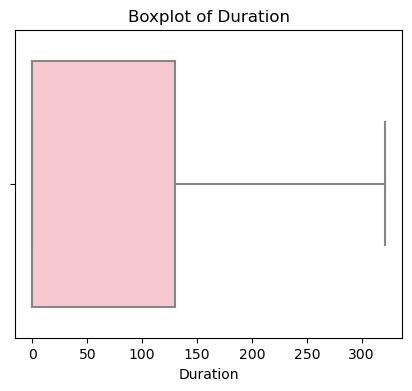

In [36]:
df['Duration'] = df['Duration'].astype(int)

# Create the boxplot with a custom color
plt.figure(figsize=(5, 4))
sns.boxplot(x=df['Duration'], color='pink')
plt.title('Boxplot of Duration')
plt.xlabel('Duration')
plt.show()

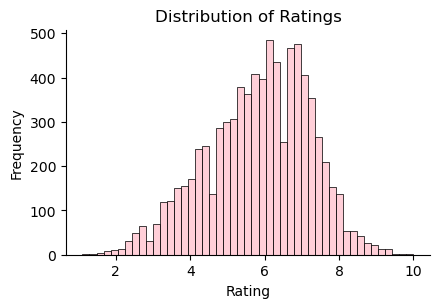

In [64]:
sns.displot(df['Rating'], color="pink", height=3, aspect=1.5)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [41]:

top = df.sort_values("Votes", ascending=False).head(10)[[ "Name", "Year", "Duration", "Votes", "Director","Actor 1"]].reset_index(drop=True)

In [42]:
top

,Name,Year,Duration,Votes,Director,Actor 1
0,Satyam Shivam Sundaram: Love Sublime,1978,172,999,Raj Kapoor,Shashi Kapoor
1,Hera Pheri,1976,164,998,Prakash Mehra,Saira Banu
2,Kurukshetra,2000,129,996,Mahesh Manjrekar,Mukesh Rishi
3,Aatank,1996,113,99,Prem Lalwani,Desh Mukherjee
4,Login,2012,125,99,Sanjeev Reddy,Himanshu Bhatt
5,Man Pasand,1980,0,99,Basu Chatterjee,Dev Anand
6,Mazdoor,1983,170,99,Ravi Chopra,Dilip Kumar
7,Jeena Isi Ka Naam Hai,2017,173,99,Keshhav Panneriy,Arbaaz Khan
8,Nirvana13,2011,95,99,Jitin Rawat,P.P. Bajaj
9,The Waiting Room,2010,90,99,Maneej Premnath,Raj Singh Chaudhary
